# Coursework Project

This Jupyter notebook contains the code implementation of the Required algorithms for the Travelling salesman Problems. The report provides justifications and explanations.

In [2]:
import numpy as np
import random
import pandas as pd
import timeit
from itertools import permutations, combinations
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data into a data frame
df = pd.read_csv('data/cities.csv')
df.head()

,City,X,Y
0,City_1,37.454012,95.071431
1,City_2,73.199394,59.865848
2,City_3,15.601864,15.599452
3,City_4,5.808361,86.617615
4,City_5,60.111501,70.807258


### Setting Parameters

In [38]:
# Setting parameters for better comparisons
max_iterations=1000

# Calculate the distance matrix
coordinates = df[['X', 'Y']].values
dist_matrix = np.zeros((n, n))
n = len(dist_matrix)

def calculate_dist_matrix(coordinates):
    # Calculate the pairwise distance matrix for the dataframe df.
    n = len(df)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])
    return dist_matrix

# Calculate total distance across cities
def calculate_total_distance(solution, dist_matrix):
    total_distance = 0

    # Add the distances between cities
    for i in range(len(solution) - 1):
        total_distance += dist_matrix[solution[i], solution[i + 1]]

    # Add the distance back to the first city
    total_distance += dist_matrix[solution[-1], solution[0]]
    return total_distance

# Calculate the distance matrix
dist_matrix = calculate_dist_matrix(coordinates)


### Implementing Stochastic Hill Climbing

Best route: [27, 12, 22, 8, 20, 7, 9, 24, 19, 1, 26, 17, 25, 37, 43, 23, 32, 4, 40, 31, 14, 10, 15, 45, 3, 36, 33, 47, 44, 6, 35, 38, 41, 18, 39, 30, 16, 5, 21, 2, 49, 29, 28, 46, 48, 42, 11, 13, 34, 0]
Minimum distance for best route: 1240.3164021717314


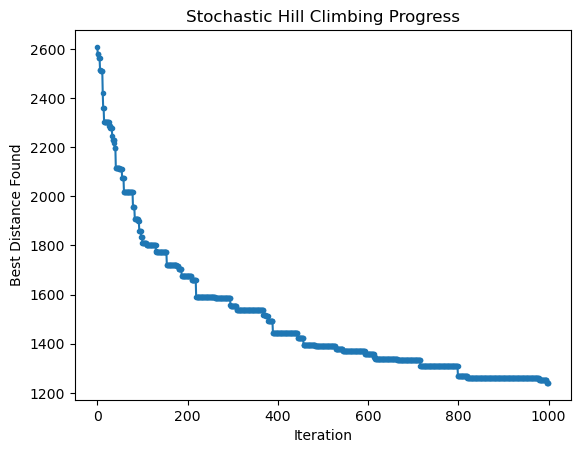

In [46]:
def stochastic_hill_climbing(dist_matrix, max_iterations):
    # Seed for reproducibility result
    random.seed(15)

    # Start with a random solution
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_total_distance(current_solution, dist_matrix)

    # Keep track of the best solution we've ever seen
    best_solution = current_solution[:]
    best_cost = current_cost

    # Track scores for plotting
    scores_shc = []

    for i in range(max_iterations):
        # Generate a neighbor solution
        neighbor = generate_neighbor(current_solution)
        neighbor_cost = calculate_total_distance(neighbor, dist_matrix)

        # Accept if the neighbor is better
        if neighbor_cost < current_cost:
            current_solution = neighbor[:]
            current_cost = neighbor_cost

        # Update the best solution found
        if current_cost < best_cost:
            best_solution = current_solution[:]
            best_cost = current_cost

        # Track progress and append scores
        scores_shc.append(best_cost)

    return best_solution, best_cost, scores_shc

def generate_neighbor(solution):
    neighbor = solution[:]

    # Randomly swap two cities
    i, j = random.sample(range(len(solution)), 2)
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor


# Run the algorithm
best_route, min_distance, scores_shc = stochastic_hill_climbing(dist_matrix, max_iterations=1000)

print("Best route:", best_route)
print("Minimum distance for best route:", min_distance)


# Plot the scores
plt.plot(scores_shc, '.-')
plt.xlabel('Iteration')
plt.ylabel('Best Distance Found')
plt.title('Stochastic Hill Climbing Progress')
plt.show()

In [8]:
# Get Execution Time
def run_shc():
    stochastic_hill_climbing(dist_matrix, max_iterations)

# Measure execution time
execution_time = timeit.timeit(run_shc, number=1)
print(f"\033[1Execution Time: {execution_time:.4f} seconds\033[0m")

xecution Time: 0.1601 seconds


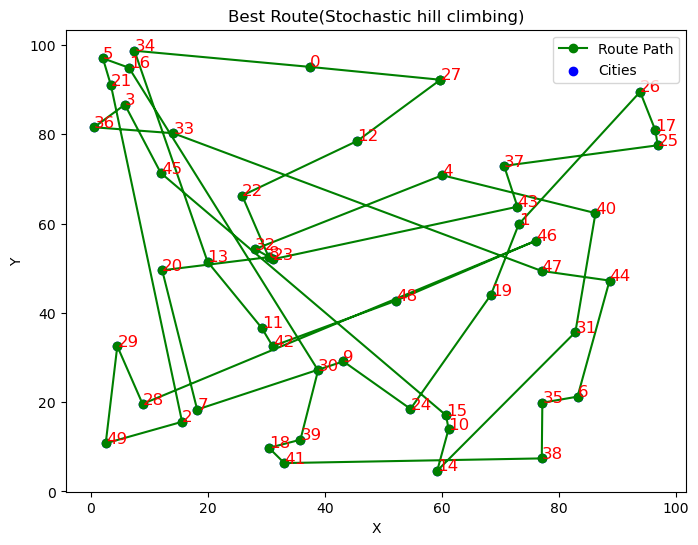

In [9]:
# Plotting of route visualisation
def plot_route(route, coordinates, title="TSP Routes"):
    plt.figure(figsize=(8, 6))
    x = [coordinates[city][0] for city in route] + [coordinates[route[0]][0]]
    y = [coordinates[city][1] for city in route] + [coordinates[route[0]][1]]
    plt.plot(x, y, marker='o', color='green', label="Route Path")
    plt.scatter(*zip(*coordinates), color="blue", label="Cities")
    plt.title(title)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], str(i), fontsize=12, color='red')


# Calling the function
plot_route(best_route, coordinates, title="Best Route(Stochastic hill climbing)")

The above solves TSP using a greedy and stochastic approach. It avoids exhaustive search by focusing on improving the solution iteratively. However, it might get stuck in local optima.

### Implementing ILS

Restart 0, best: cost = 1112.28500
Restart 2, best: cost = 1003.73441
Restart 8, best: cost = 943.08071
Restart 62, best: cost = 884.65789
Restart 508, best: cost = 879.70075
Best route (ILS): [49, 7, 2, 30, 41, 39, 18, 11, 23, 8, 32, 42, 24, 10, 38, 14, 9, 0, 16, 34, 5, 21, 3, 36, 45, 22, 27, 26, 17, 25, 37, 43, 1, 48, 47, 44, 31, 6, 15, 35, 19, 46, 40, 4, 12, 33, 20, 13, 29, 28]
Minimum distance (ILS): 879.700753970358


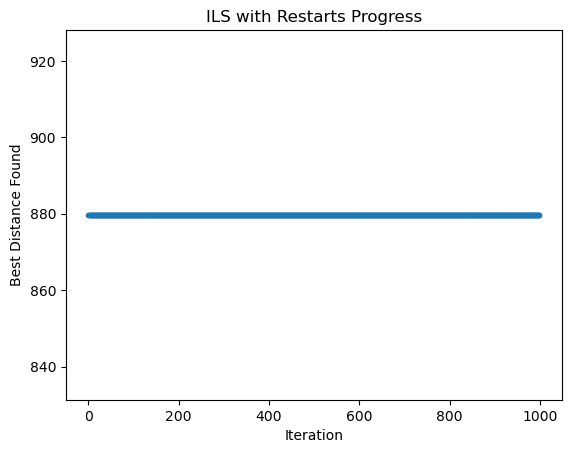

In [52]:
# Modified hill climbing local search algorithm
def hillclimbing(dist_matrix, max_iterations):   
    current_solution_ils = list(range(n))
    random.shuffle(current_solution_ils)
    current_cost_ils = calculate_total_distance(current_solution_ils, dist_matrix)

    for _ in range(max_iterations):
        # Generate a neighbor solution (swap two cities)
        neighbor_ils = current_solution_ils[:]
        i, j = random.sample(range(len(neighbor_ils)), 2)
        neighbor_ils[i], neighbor_ils[j] = neighbor_ils[j], neighbor_ils[i]

        neighbor_cost_ils = calculate_total_distance(neighbor_ils, dist_matrix)

        # Accept if better
        if neighbor_cost_ils < current_cost_ils:
            current_solution_ils = neighbor_ils[:]
            current_cost_ils = neighbor_cost_ils

    return current_solution_ils, current_cost_ils


# Modified iterated local search algorithm
def iterated_local_search(dist_matrix, max_iterations, n_restarts, p_size):
    # Seed for reproducibility result
    random.seed(15)
    
    best_solution_ils = list(range(n))
    random.shuffle(best_solution_ils)  # Initial random solution
    best_cost_ils = calculate_total_distance(best_solution_ils, dist_matrix)

    scores_ils = []
    for restarts in range(n_restarts):
        # Generate a perturbed initial solution
        start_solution_ils = perturb_solution(best_solution_ils, p_size)

        # Perform hill climbing
        solution_ils, cost_ils = hillclimbing(dist_matrix, max_iterations)

        # Check for new best
        if cost_ils < best_cost_ils:
            best_solution_ils, best_cost_ils = solution_ils, cost_ils
            print(f"Restart {restarts}, best: cost = {best_cost_ils:.5f}")
        
    for _ in range(max_iterations):
        scores_ils.append(best_cost_ils)

    return best_solution_ils, best_cost_ils, scores_ils

# Function to perturb a solution
def perturb_solution(solution_ils, p_size):
    num_swaps = int(len(solution_ils) * p_size)
    perturbed_solution = solution_ils[:]
    for _ in range(num_swaps):
        i, j = random.sample(range(len(perturbed_solution)), 2)
        perturbed_solution[i], perturbed_solution[j] = perturbed_solution[j], perturbed_solution[i]
    return perturbed_solution


best_route_ils, min_distance_ils, scores_ils = iterated_local_search(dist_matrix, max_iterations=1000, n_restarts=1000, p_size=0.2)

print("Best route (ILS):", best_route_ils)
print("Minimum distance (ILS):", min_distance_ils)

# Plot the scores
plt.plot(scores_ils, '.-')
plt.xlabel('Iteration')
plt.ylabel('Best Distance Found')
plt.title('ILS with Restarts Progress')
plt.show()

In [54]:
# Get Execution Time
def run_ils():
    iterated_local_search(dist_matrix, max_iterations=1000,n_restarts=1000, p_size=0.2)

# Measure execution time
execution_time_ils = timeit.timeit(run_ils, number=1)
print(f"\033[1Execution Time: {execution_time_ils:.4f} seconds\033[0m")

Restart 0, best: cost = 1112.28500
Restart 2, best: cost = 1003.73441
Restart 8, best: cost = 943.08071
Restart 62, best: cost = 884.65789
Restart 508, best: cost = 879.70075
xecution Time: 10.9424 seconds


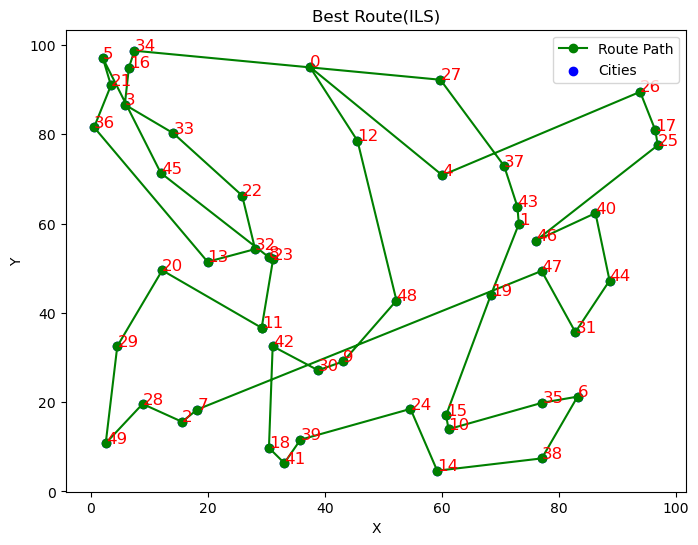

In [14]:
# Visualisation
plot_route(best_route_ils, coordinates, title="Best Route(ILS)")

### Comparing results for Hill climbing

In [16]:
len(scores_ils)

1000

In [17]:
# Statistical test: Ttest
t_stat, p_value = ttest_rel(scores_shc, scores_ils)

print(f"T-test ILS vs SSCH: t_stat = {t_stat:.4f}, p_value = {p_value:.4f}")
if p_value < 0.05:
    print("The difference between the ILS vs SCH is statistically significant.")
else:
    print("No significant difference between the models.")

T-test ILS vs SSCH: t_stat = 75.4481, p_value = 0.0000
The difference between the ILS vs SCH is statistically significant.


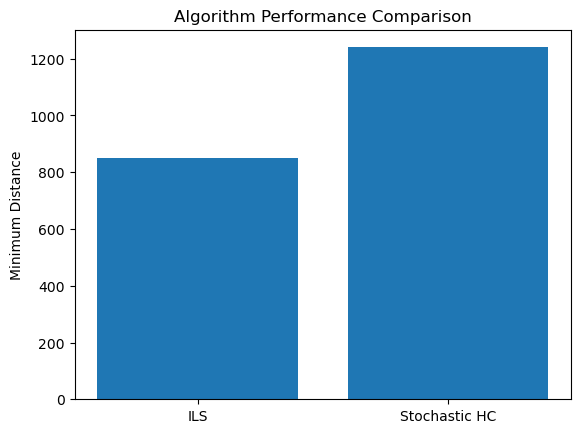

In [18]:
# Plotting efficiency
results = {'ILS': scores_ils[-1], 'Stochastic HC': scores_shc[-1]}
plt.bar(results.keys(), results.values())
plt.ylabel('Minimum Distance')
plt.title('Algorithm Performance Comparison')
plt.show()

In [19]:
# Getting the mean and standard deviation
print(f"ILS Average Best Cost: {np.mean(scores_ils):.2f} ± {np.std(scores_ils):.2f}")
print(f"SHC Average Best Cost: {np.mean(scores_shc):.2f} ± {np.std(scores_shc):.2f}")

ILS Average Best Cost: 849.39 ± 0.00
SHC Average Best Cost: 1499.00 ± 272.14


The comparison tests above show that Iterated Local search gave a better result than Stochastic hill climbing, even though the algorithm might not escape a strong local optimum. I will be using the Iterated Local search for comparison against the other optimisation methods

## Simulated Annealing

Best route (SA): [17, 25, 11, 30, 10, 38, 35, 12, 27, 4, 37, 43, 1, 31, 46, 19, 48, 32, 5, 34, 16, 0, 22, 20, 24, 14, 18, 49, 28, 42, 13, 45, 33, 3, 21, 36, 29, 2, 7, 41, 39, 8, 23, 9, 15, 6, 47, 44, 40, 26]
Minimum distance (SA): 1073.7795668804206


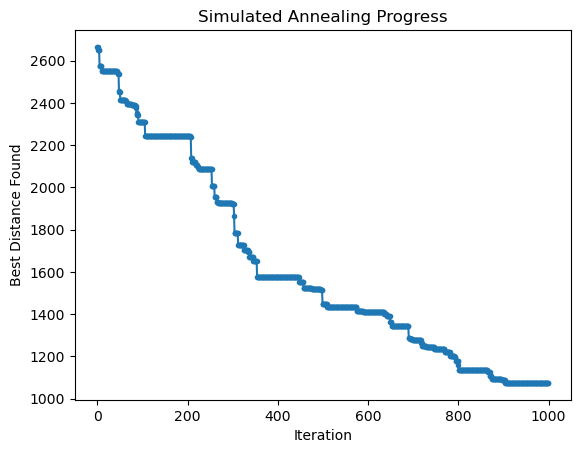

In [36]:
def generate_neighbor_sa(solution_sa):
    neighbor_sa = solution_sa[:]
    i, j = random.sample(range(len(solution_sa)), 2)
    neighbor_sa[i], neighbor_sa[j] = neighbor_sa[j], neighbor_sa[i]
    return neighbor_sa

def simulated_annealing(dist_matrix, max_iterations_sa, initial_temp, cool_rate):
    # Seed for reproducibility result
    random.seed(15)
    
    current_sol_sa = list(range(n))
    random.shuffle(current_sol_sa)
    current_cost_sa = calculate_total_distance(current_sol_sa, dist_matrix)

    best_sol_sa = current_sol_sa[:]
    best_cost_sa = current_cost_sa
    temp = initial_temp

    # Track scores for plotting
    scores_sa = []

    for _ in range(max_iterations_sa):
        # Generate a neighbor solution
        neighbor_sa = generate_neighbor_sa(current_sol_sa)
        neighbor_cost_sa = calculate_total_distance(neighbor_sa, dist_matrix)

        # Accept if the neighbor is better
        if neighbor_cost_sa < current_cost_sa or \
           random.uniform(0, 1) < np.exp((current_cost_sa - neighbor_cost_sa) / temp):
            current_sol_sa = neighbor_sa[:]
            current_cost_sa = neighbor_cost_sa

        # Update the best solution found
        if current_cost_sa < best_cost_sa:
            best_sol_sa = current_sol_sa[:]
            best_cost_sa = current_cost_sa

        # Cooling Process
        temp = max(temp * cool_rate, 1e-6)

        # Track progress
        scores_sa.append(best_cost_sa )

    return best_sol_sa, best_cost_sa, scores_sa

# Getting Results
best_route_sa, min_distance_sa, scores_sa = simulated_annealing(dist_matrix, max_iterations_sa=1000, initial_temp=100, cool_rate=0.995)
print("Best route (SA):", best_route_sa)
print("Minimum distance (SA):", min_distance_sa)

# Plot the scores
plt.plot(scores_sa, '.-')
plt.xlabel('Iteration')
plt.ylabel('Best Distance Found')
plt.title('Simulated Annealing Progress')
plt.show()

In [25]:
# Get Execution Time
def run_sa():
    simulated_annealing(dist_matrix, max_iterations_sa=1000, initial_temp=100, cool_rate=0.995)

# Measure execution time
execution_time_sa = timeit.timeit(run_sa, number=1)
print(f"\033[1mExecution Time: {execution_time_sa:.4f} seconds\033[0m")

Execution Time: 0.0136 seconds


In [27]:
plot_route(best_route_sa, coordinates, title="Best Route(SA)")

NameError: name 'best_route_sa' is not defined

## TABU Search

In [ ]:
# Tabu Search implementation
def tabu_search(dist_matrix, max_iterations, tabu_tenure=10):
    # Seed for reproducibility result
    random.seed(15)
    
    current_sol_tbs = list(range(n))
    random.shuffle(current_sol_tbs)
    current_cost_tbs = calculate_total_distance(current_sol_tbs, dist_matrix)

    best_sol_tbs = current_sol_tbs[:]
    best_cost_tbs = current_cost_tbs

    # Initialize an empty tabu list
    tabu_list = []

    # Track scores for plotting
    scores_tbs = []

    for iter in range(max_iterations):
        neighbors_tbs = []
        for i in range(len(current_sol_tbs)):
            for j in range(i + 1, len(current_sol_tbs)):
                neighbor_tbs = current_sol_tbs[:]
                neighbor_tbs[i], neighbor_tbs[j] = neighbor_tbs[j], neighbor_tbs[i]
                neighbors_tbs.append(neighbor_tbs)

        best_neighbor_tbs = None
        best_neighbor_cost_tbs = float('inf')

        for neighbor_tbs in neighbors_tbs:
            neighbor_cost_tbs = calculate_total_distance(neighbor_tbs, dist_matrix)

            is_tabu = any(neighbor_tbs == tabu_move[0] for tabu_move in tabu_list)

            # Aspiration criterion: if the neighbor is better than the best solution found, ignore the tabu restriction
            if neighbor_cost_tbs < best_cost_tbs or not is_tabu:
                if neighbor_cost_tbs < best_neighbor_cost_tbs:
                    best_neighbor_cost_tbs = neighbor_cost_tbs
                    best_neighbor_tbs = neighbor_tbs

        if best_neighbor_tbs is not None:
            # Update current solution and its cost
            current_sol_tbs = best_neighbor_tbs[:]
            current_cost_tbs = best_neighbor_cost_tbs

            # Update best solution found and its cost
            if current_cost_tbs < best_cost_tbs:
                best_sol_tbs = current_sol_tbs[:]
                best_cost_tbs = current_cost_tbs

            # Update the tabu list
            tabu_list.append((current_sol_tbs, iter))

            # Remove old entries from the tabu list
            if len(tabu_list) > tabu_tenure:
                tabu_list.pop(0)

            scores_tbs.append(current_cost_tbs)

    return best_sol_tbs, best_cost_tbs, scores_tbs


# Getting Results
best_route_tbs, min_distance_tbs, scores_tbs = tabu_search(dist_matrix, max_iterations=1000, tabu_tenure=10)
print("Best route (Tabu Search):", best_route_tbs)
print("Minimum distance (Tabu Search):", min_distance_tbs)

# Plot the scores
plt.plot(scores_tbs, '.-')
plt.xlabel('Iteration')
plt.ylabel('Best Distance Found')
plt.title('Tabu Search Progress')
plt.show()

In [ ]:
# Time Evaluation
def run_tbs():
    tabu_search(dist_matrix, max_iterations=1000, tabu_tenure=10)

# Measure execution time
execution_time_tbs = timeit.timeit(run_tbs, number=1)
print(f"\033[1mExecution Time: {execution_time_tbs:.4f} seconds\033[0m")

In [ ]:
plot_route(best_route_tbs, coordinates, title="Best Route (Tabu Search)")

## Comparison of Single-Solution-Driven Search Algorithm

In [ ]:
# Ttests
t_stat1, p_value1 = ttest_rel(scores_sa, scores_ils)
t_stat2, p_value2 = ttest_rel(scores_sa, scores_tbs)
t_stat3, p_value3 = ttest_rel(scores_ils, scores_tbs)

print(f"T-test ILS vs Simulated Annealing: t_stat = {t_stat1:.4f}, p_value = {p_value1:.5f}")
if p_value1 < 0.05:
    print("The difference between the ILS vs Simulated Annealing is statistically significant.")
else:
    print("No significant difference between the models.")
print()

print(f"T-test Simulated Annealing vs Tabu Search: t_stat = {t_stat2:.4f}, p_value = {p_value2:.5f}")
if p_value2 < 0.05:
    print("The difference between the Simulated Annealing vs Tabu Search is statistically significant.")
else:
    print("No significant difference between the models.")
print()

print(f"T-test ILS vs Tabu Search: t_stat = {t_stat3:.4f}, p_value = {p_value3:.5f}")
if p_value2 < 0.05:
    print("The difference between the ILS vs Tabu Search is statistically significant.")
else:
    print("No significant difference between the models.")

In [ ]:
# Getting the mean and standard deviation
print(f"ILS Average Best Cost: {np.mean(scores_ils):.2f} ± {np.std(scores_ils):.2f}")
print(f"SA Average Best Cost: {np.mean(scores_sa):.2f} ± {np.std(scores_sa):.2f}")
print(f"TB Average Best Cost: {np.mean(scores_tbs):.2f} ± {np.std(scores_tbs):.2f}")

In [ ]:
# Plotting efficiency
results = {'ILS': scores_ils[-1], 'Simulated Annealing': scores_sa[-1], 'Tabu Search': scores_tbs[-1],}
plt.bar(results.keys(), results.values())
plt.ylabel('Minimum Distance')
plt.title('Algorithm Performance Comparison')
plt.show()

From the above Ttests , there is a significant difference between the three algorithms implemented.
The Tabu Search has a better performance so i will be comparing it against the Genetic Algorithm.

## Genetic Algorithm

In [ ]:
def genetic_algorithm(dist_matrix, population_size, generations, mutation_rate):
    # Seed for reproducibility result
    random.seed(15)

    # Initialize population
    population = []
    for _ in range(population_size):
        solution_ga = list(range(n))
        random.shuffle(solution_ga)
        population.append(solution_ga)

    # Evaluate fitness
    def calculate_fitness(solution_ga):
        return 1 / calculate_total_distance(solution_ga, dist_matrix)

    # Selection
    def select_parents(population):
        fitness_scores = [calculate_fitness(solution_ga) for solution_ga in population]
        total_fitness = sum(fitness_scores)
        probabilities = [fitness / total_fitness for fitness in fitness_scores]
        parents = random.choices(population, weights=probabilities, k=2)
        return parents

    # Crossover
    def crossover(parent1, parent2):
        crossover_point = random.randint(1, len(parent1) - 2)
        child = parent1[:crossover_point]
        for city in parent2:
            if city not in child:
                child.append(city)
        return child

    # Mutation
    def mutate(solution_ga):
        if random.random() < mutation_rate:
            i, j = random.sample(range(len(solution_ga)), 2)
            solution_ga[i], solution_ga[j] = solution_ga[j], solution_ga[i]
        return solution_ga

    # Main loop
    best_sol_ga = None
    best_cost_ga = float('inf')
    scores_ga = []
    for generation in range(generations):
      new_population = []

      for _ in range(population_size):
        parent1, parent2 = select_parents(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)
        elite = min(population, key=lambda sol: calculate_total_distance(sol, dist_matrix))
        new_population[0] = elite
      population = new_population
      for solution_ga in population:
          cost_ga = calculate_total_distance(solution_ga, dist_matrix)
          if cost_ga < best_cost_ga:
              best_cost_ga = cost_ga
              best_sol_ga = solution_ga

      if generation % 100 == 0:
          print(f"Generation {generation}: {cost_ga}")

      scores_ga.append(best_cost_ga)
    return best_sol_ga, best_cost_ga, scores_ga


# Calling function
best_route_ga, min_distance_ga, scores_ga = genetic_algorithm(dist_matrix, population_size=100, generations=1000, mutation_rate=0.01)
print("Best route (GA):", best_route_ga)
print("Minimum distance (GA):", min_distance_ga)

# Plot the scores
plt.plot(scores_ga, '.-')
plt.xlabel('Generation')
plt.ylabel('Best Distance Found')
plt.title('Genetic Algorithm Progress')
plt.show()

In [ ]:
# Time Evaluation
def run_ga():
    genetic_algorithm(dist_matrix, population_size=100, generations=1000, mutation_rate=0.01)

# Measure execution time
execution_time_ga = timeit.timeit(run_ga, number=1)
print(f"\033[1mExecution Time: {execution_time_ga:.4f} seconds\033[0m")

In [ ]:
# Getting the mean and standard deviation
print(f"GA Average Best Cost: {np.mean(scores_ga):.2f} ± {np.std(scores_ga):.2f}")

In [ ]:
plot_route(best_route_ga, coordinates,  title="Best Route(GA)")

### Comparison between Tabu Search and Genetic Algorithm

In [ ]:
t_stat_ga, p_value_ga = ttest_rel(scores_ga, scores_tbs)

print(f"T-test TBS vs GA: t_stat = {t_stat_ga:.4f}, p_value_ga = {p_value:.4f}")
if p_value_ga < 0.05:
    print("The difference between the ILS vs SCH is statistically significant.")
else:
    print("No significant difference between the models.")

In [ ]:
# Plotting efficiency
results_ga = {'Tabu Search': scores_tbs[-1], 'Genetic Algorithm': scores_ga[-1]}
plt.bar(results_ga.keys(), results_ga.values())
plt.ylabel('Minimum Distance')
plt.title('Algorithm Performance Comparison(TS vs GA)')
plt.show()

### Comparison of All Algorithms Implemented

In [ ]:
# Getting lengths of scores
iterations_tbs = list(range(len(scores_tbs)))
generations_ga = list(range(len(scores_ga)))
iterations_sa = list(range(len(scores_sa)))
iterations_ils = list(range(len(scores_ils)))



# Plot both progressions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(iterations_tbs, scores_tbs, label='Tabu Search with Long-Term Memory (TBS)', marker='d')
plt.plot(generations_ga, scores_ga, label='Genetic Algorithm (GA)', marker='x')
plt.plot(iterations_sa, scores_sa, label='Simulated Annealing (SA)', marker='o')
plt.plot(iterations_ils, scores_ils, label='Iterated Local Search (ILS)', marker='^')

# Customize the plot
plt.xlabel('Iteration/Generation')
plt.ylabel('Best Distance Found')
plt.title('Comparison: Tabu Search (TBS) vs Genetic Algorithm (GA)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
# Plotting efficiency
results_all = {'ILS': scores_ils[-1], 'Simulated Annealing': scores_sa[-1], 'Tabu Search': scores_tbs[-1], 'Genetic Algorithm': scores_ga[-1]}
plt.bar(results_all.keys(), results_all.values())
plt.ylabel('Minimum Distance')
plt.title('Algorithm Performance Comparison(All Implemented)')


# Display the plot
plt.show()

In [ ]:
# Time execution comparison of all algorithms
plt.figure(figsize=(10, 8))
Time_all = {'SHC': execution_time, 'ILS': execution_time_ils, 'Simulated Annealing': execution_time_sa, 'Tabu Search': execution_time_tbs, 'Genetic Algorithm': execution_time_ga}
plt.bar(Time_all.keys(), Time_all.values())
plt.ylabel('Time (seconds)')
plt.xlabel('All Algorithms Implemented')
plt.title('Algorithm Performance Comparison(All Implemented)')

# Display the plot
plt.show()